In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['review'])

In [4]:
# Convert the text data to sequences
x_train = tokenizer.texts_to_sequences(train_df['review'])
x_test = tokenizer.texts_to_sequences(test_df['review'])

In [5]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [6]:
y_train = train_df['sentiment'].replace({'positive': 1, 'negative': 0})
y_test = test_df['sentiment'].replace({'positive': 1, 'negative': 0})

In [7]:
model = Sequential()
model.add(Embedding(max_words, 16, input_length=max_len))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
282/282 [==============================] - 3s 7ms/step - loss: 0.4974 - accuracy: 0.7430 - val_loss: 0.3284 - val_accuracy: 0.8608
Epoch 2/10
282/282 [==============================] - 2s 7ms/step - loss: 0.2482 - accuracy: 0.9009 - val_loss: 0.3146 - val_accuracy: 0.8662
Epoch 3/10
282/282 [==============================] - 3s 9ms/step - loss: 0.1489 - accuracy: 0.9494 - val_loss: 0.3602 - val_accuracy: 0.8570
Epoch 4/10
282/282 [==============================] - 3s 9ms/step - loss: 0.0668 - accuracy: 0.9851 - val_loss: 0.4293 - val_accuracy: 0.8472
Epoch 5/10
282/282 [==============================] - 3s 9ms/step - loss: 0.0231 - accuracy: 0.9974 - val_loss: 0.5126 - val_accuracy: 0.8438
Epoch 6/10
282/282 [==============================] - 3s 9ms/step - loss: 0.0087 - accuracy: 0.9995 - val_loss: 0.5473 - val_accuracy: 0.8457
Epoch 7/10
282/282 [==============================] - 3s 9ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.5853 - val_accuracy: 0.8472
Epoch 

In [10]:
# Make predictions on test data
predictions = model.predict(x_test)
predicted_labels = np.round(predictions).flatten()

313/313 [==============================] - 1s 3ms/step


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
classification_rep = classification_report(y_test, predicted_labels)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [13]:
# Create the confusion matrix
confusion_mtx = confusion_matrix(y_test, predicted_labels)
print('Confusion Matrix:')
print(confusion_mtx)

Confusion Matrix:
[[4180  781]
 [ 777 4262]]


In [16]:
import seaborn as sns


<AxesSubplot:>

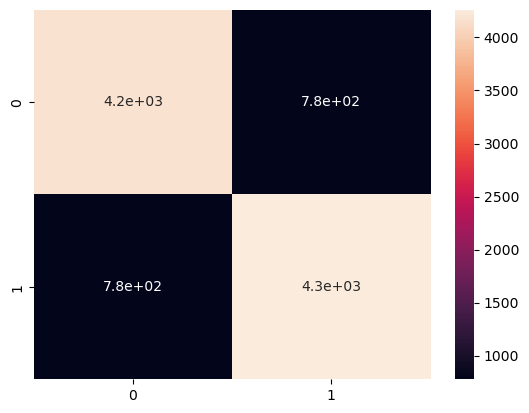

In [15]:
sns.heatmap(confusion_mtx, annot = True)